In [196]:
#importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preparacion inicial de los datos

In [197]:
#traer los datasets
df_conversion = pd.read_csv('table_A_conversions.csv')
df_attribution = pd.read_csv('table_B_attribution.csv')

In [198]:
#renombrar columnas por su nombre en minusculas
df_conversion.columns = df_conversion.columns.str.lower()
df_attribution.columns = df_attribution.columns.str.lower()

In [199]:
df_conversion.head()

,conv_date,revenue,user_id,conv_id
0,06-03-2017,47.00000,5094298f068196c5349d43847de5afc9125cf989,881152bb20f9b73daafb99d77714f38ac702629c
1,02-03-2017,98.00004,NaN,faf5c1181ea84a32237dff45ca201d2c28f19d7b
2,02-03-2017,180.35300,NaN,b0e58a88459ece1b585ca22c93e633dc56273b83
3,23-03-2017,201.94104,433fdf385e33176cf9b0d67ecf383aa928fa261c,f0e6b7de22332c7b18c024e550bb1d860130cdf1
4,03-03-2017,197.47008,NaN,966568c7c859480c79b212520d20a51e735fd735


In [200]:
df_attribution.head()

,channel,ihc_conv,conv_id
0,H,1.000000,881152bb20f9b73daafb99d77714f38ac702629c
1,I,0.300250,faf5c1181ea84a32237dff45ca201d2c28f19d7b
2,A,0.322839,faf5c1181ea84a32237dff45ca201d2c28f19d7b
3,E,0.376911,faf5c1181ea84a32237dff45ca201d2c28f19d7b
4,H,1.000000,b0e58a88459ece1b585ca22c93e633dc56273b83


In [201]:
#revision de completitud de los datos y su tipo
print('df_conversion')
display(df_conversion.info())
print('-'*50)
print('df_attribution')
display(df_attribution.info())

df_conversion
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79643 entries, 0 to 79642
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   conv_date  79643 non-null  object 
 1   revenue    79643 non-null  float64
 2   user_id    77347 non-null  object 
 3   conv_id    79643 non-null  object 
dtypes: float64(1), object(3)
memory usage: 2.4+ MB


None

--------------------------------------------------
df_attribution
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211060 entries, 0 to 211059
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   channel   211060 non-null  object 
 1   ihc_conv  211060 non-null  float64
 2   conv_id   211060 non-null  object 
dtypes: float64(1), object(2)
memory usage: 4.8+ MB


None

In [202]:
#verificar q los id de conversion sean realmente unicos
len(df_conversion['conv_id'].unique()) == len(df_conversion)

True

En el dataset de conversion, la columna de user_id tiene datos nulos que deberán ser tratados mas adelante, se debe cambiar el tipo de dato de conv_date a formato fecha. El dataframe de attribution se encuentra completo a primera vista

In [203]:
#convierto columna de fecha de conversion en tipo datetime con el fin de facilitar análisis posteriores
df_conversion['conv_date'] = pd.to_datetime(df_conversion['conv_date'], dayfirst=True)

In [204]:
#revisar un resumen general de variables numericas y fecha
df_conversion.describe(datetime_is_numeric=True)

,conv_date,revenue
count,79643,79643.000000
mean,2017-09-14 11:57:00.458797312,181.695055
min,2017-03-01 00:00:00,20.000000
25%,2017-06-07 00:00:00,114.232000
50%,2017-09-25 00:00:00,158.470600
75%,2017-12-18 00:00:00,217.592000
max,2018-03-26 00:00:00,4596.476000
std,NaN,109.244220


Se ve que el revenue tiene una cola larga en la derecha, el salto entre el percentil 75 y el máximo es muy grande a comparación de los otros rangos

# Primera parte

Revisión de las variables del primer dataframe

In [205]:
#puedo reemplazar los valores nulos de usuario con "no_user_id" para asi seguir trabajando si conflictos
df_conversion['user_id'].fillna('no_user_id', inplace=True)

<AxesSubplot:xlabel='revenue', ylabel='Density'>

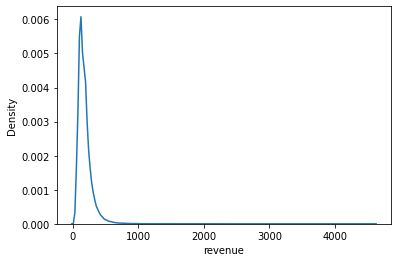

In [206]:
#se realiza grafico de la distribución del revenue confirmando lo visto anteriormente
sns.kdeplot(df_conversion['revenue'])

In [207]:
#desglose de la fecha
df_conversion['conv_date_day'] = df_conversion['conv_date'].dt.day
df_conversion['conv_date_month'] = df_conversion['conv_date'].dt.month
df_conversion['conv_date_year'] = df_conversion['conv_date'].dt.year
df_conversion['conv_date_dow'] = df_conversion['conv_date'].dt.weekday
df_conversion['conv_date_year_month'] = df_conversion['conv_date'].dt.strftime('%Y-%m')

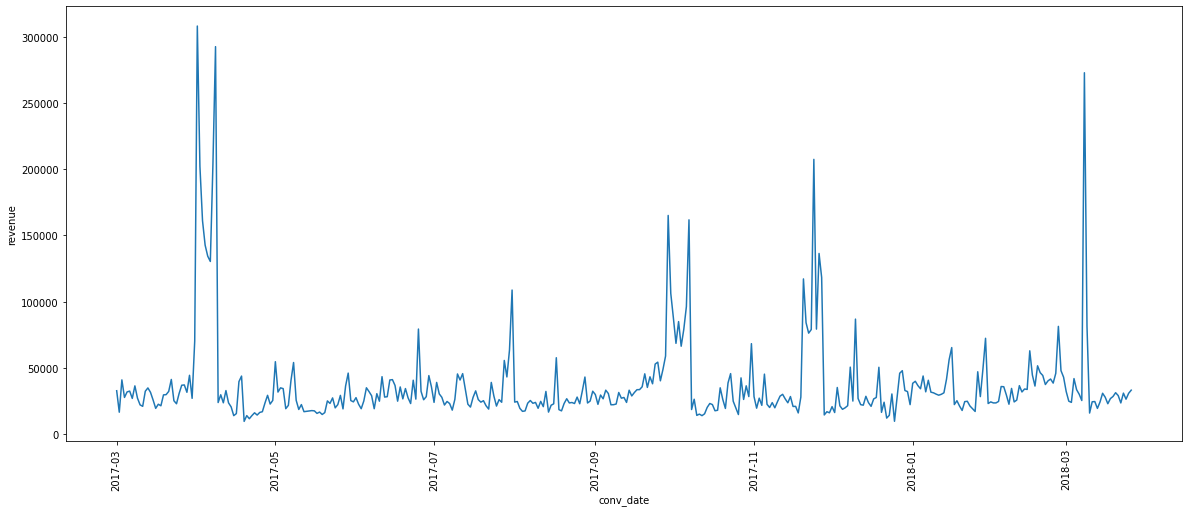

In [208]:
#se realiza una agrupacion del revenue por cada dia
df_conv_dia = df_conversion.groupby(['conv_date'])['revenue'].sum().reset_index()

#grafico los datos de revenue a nivel de dia
plt.figure(figsize=(20,8))
sns.lineplot(x='conv_date', y='revenue', data=df_conv_dia)
plt.xticks(rotation=90)
plt.show()

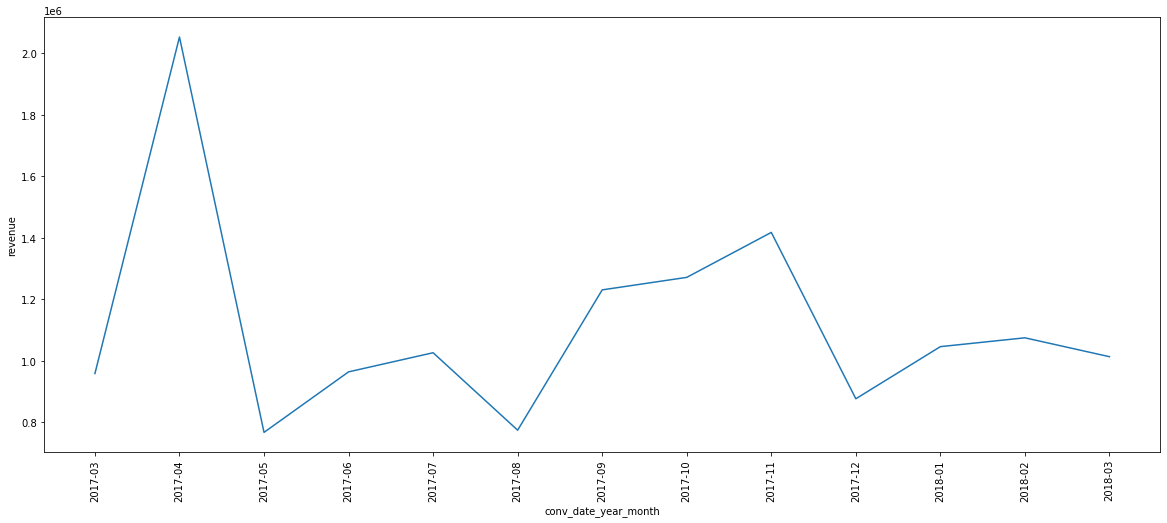

In [209]:
#se realiza una agrupacion del revenue por cada mes
df_conv_mes = df_conversion.groupby(['conv_date_year_month'])['revenue'].sum().reset_index()

#grafico los datos de revenue a nivel de dia
plt.figure(figsize=(20,8))
sns.lineplot(x='conv_date_year_month', y='revenue', data=df_conv_mes)
plt.xticks(rotation=90)
plt.show()

Se proceden a comparar el comportamiento por dias, dias de la semana, meses y hacerlo tambien año con año

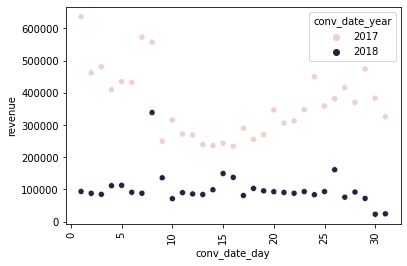

In [210]:
sns.scatterplot(data = df_conversion.groupby(['conv_date_year', 'conv_date_day'])['revenue'].sum().reset_index(), x='conv_date_day', y='revenue', hue='conv_date_year')
plt.xticks(rotation=90)
plt.show()

Curiosamente el patron de mayor revenue en la compras es distinto entre año, claro está que el único año completo es el 2017 y el unico mes en comun para ambos años es marzo. Por tal motivo se procede a revisar mes a mes esta comparacion

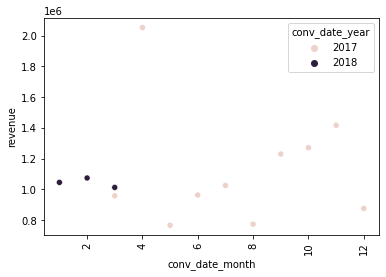

In [211]:
sns.scatterplot(data = df_conversion.groupby(['conv_date_year', 'conv_date_month'])['revenue'].sum().reset_index(), x='conv_date_month', y='revenue', hue='conv_date_year')
plt.xticks(rotation=90)
plt.show()

In [212]:
listado_meses = df_conversion['conv_date_month'].unique()

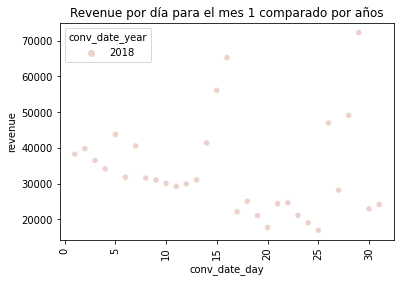

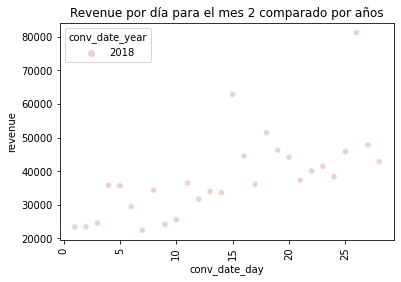

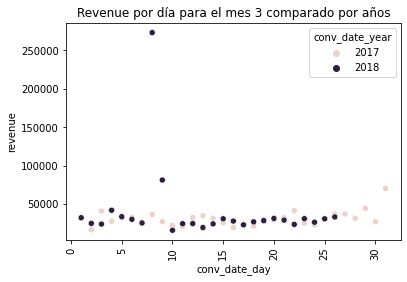

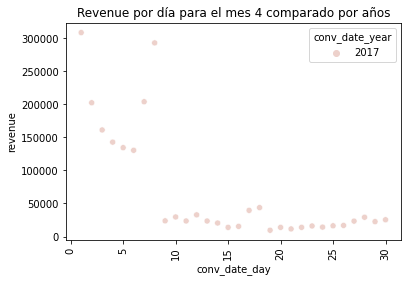

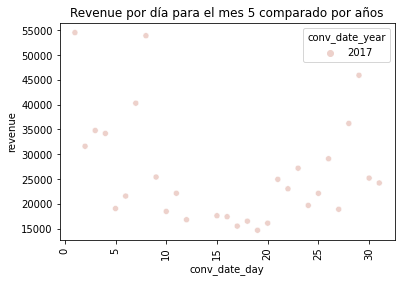

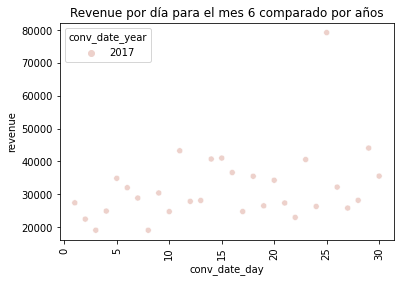

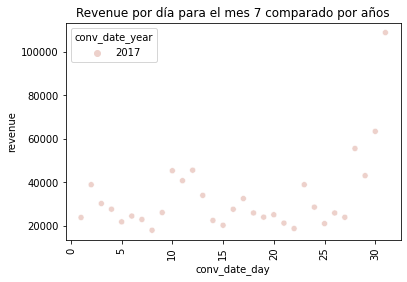

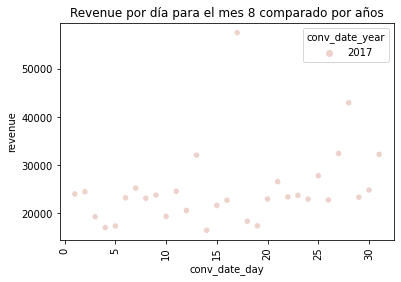

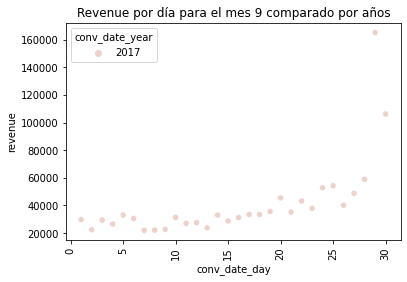

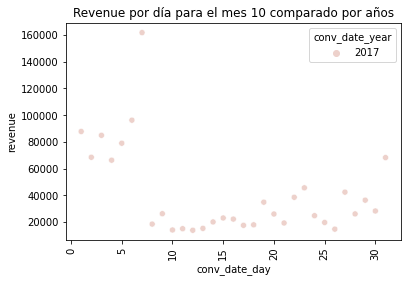

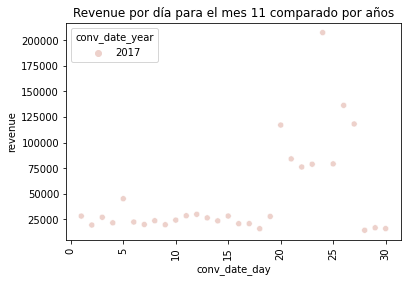

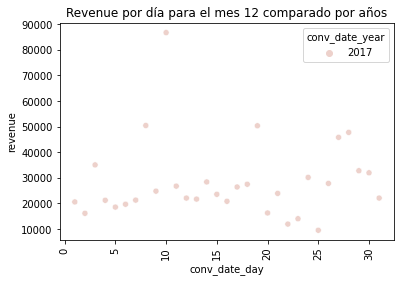

In [213]:
meses = df_conversion['conv_date_month'].unique()
meses.sort()
for month in meses:
    sns.scatterplot(data = df_conversion[df_conversion['conv_date_month']==month].groupby(['conv_date_year', 'conv_date_day'])['revenue'].sum().reset_index(), x='conv_date_day', y='revenue', hue='conv_date_year')
    plt.xticks(rotation=90)
    plt.title('Revenue por día para el mes {0} comparado por años'.format(month))
    plt.show()

Se observa que en el mes de marzo (que es el unico comun en ambos años) el patron de comportamiento a nivel de dia es similar, la tendencia global de forma cuadratica que se veía inicialmente en el 2017 está dada por los otros meses

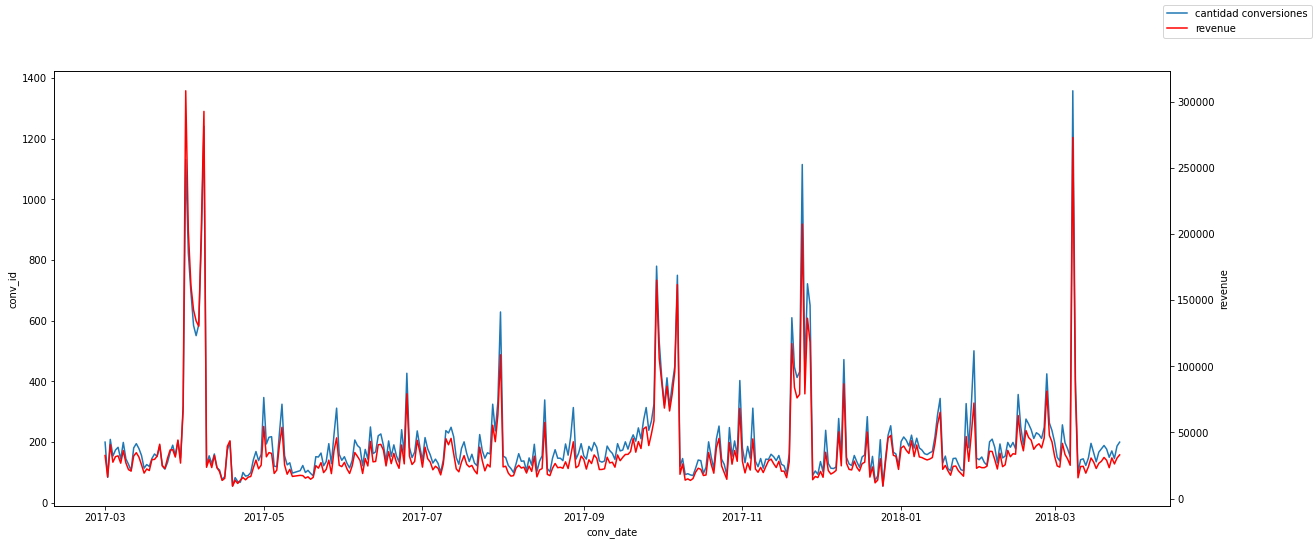

In [214]:
#se realiza una agrupacion de cantidad de transacciones por cada dia
df_conv_transacciones_dia = df_conversion.groupby(['conv_date'])['conv_id'].count().reset_index()

#grafico los datos de cantidad de transacciones vs el revenue a nivel de dia
plt.figure(figsize=(20,8))
ax = sns.lineplot(x='conv_date', y='conv_id', data=df_conv_transacciones_dia, label="cantidad conversiones", legend=False)
ax2=plt.twinx()
sns.lineplot(x='conv_date', y='revenue', data=df_conv_dia, ax=ax2, color='r', label="revenue", legend=False)
ax.figure.legend()
plt.show()

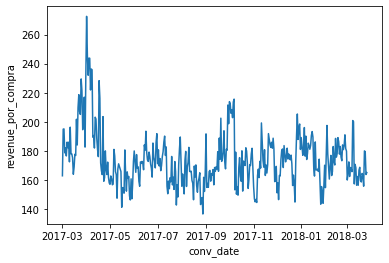

count    389.000000
mean     174.558109
std       18.824475
min      136.820204
25%      162.602588
50%      171.852682
75%      182.118984
max      272.540880
Name: revenue_por_compra, dtype: float64

In [215]:
#encontrar el revenue por compra de cada dia y algunas estadisticas al respecto
temp = df_conversion.groupby(['conv_date']).agg({'revenue':'sum', 'conv_id':'count'}).reset_index()
temp['revenue_por_compra'] = temp['revenue'] / temp['conv_id']
sns.lineplot(x='conv_date', y='revenue_por_compra', data=temp)
plt.show()
temp['revenue_por_compra'].describe()

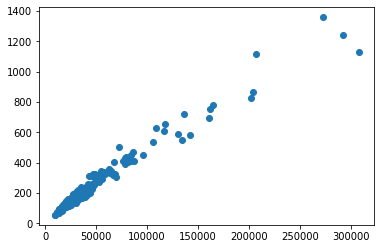

In [216]:
#relacion directa y lineal entre revenue y cantidad de transacciones por dia, de esperarse este comportamiento
temp1 = df_conversion.groupby(['conv_date']).agg({'revenue':'sum', 'conv_id':'count'}).reset_index()
plt.scatter(temp1['revenue'], temp1['conv_id'])

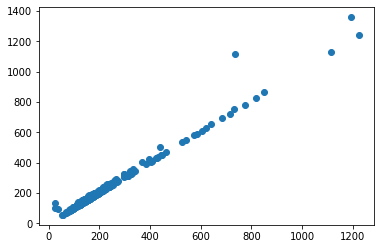

In [217]:
#relacion directa y lineal entre cantidad de transacciones y usuarios únicos cada día
temp2 = df_conversion.groupby(['conv_date']).agg({'user_id':'nunique', 'conv_id':'count'}).reset_index()
plt.scatter(temp2['user_id'], temp2['conv_id'])

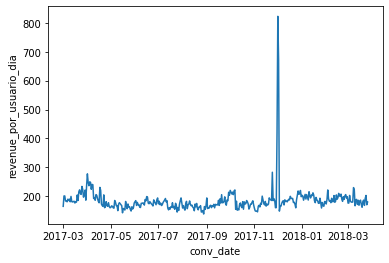

count    389.000000
mean     183.678765
std       47.534970
min      137.257329
25%      166.027007
50%      178.200716
75%      190.450101
max      823.536800
Name: revenue_por_usuario_dia, dtype: float64

In [218]:
temp3 = df_conversion.groupby(['conv_date']).agg({'user_id':'nunique', 'revenue':'sum'}).reset_index().rename(columns={'user_id':'cantidad_usuarios_unicos'})
temp3['revenue_por_usuario_dia'] = temp3['revenue'] / temp3['cantidad_usuarios_unicos']
sns.lineplot(x='conv_date', y='revenue_por_usuario_dia', data=temp3)
plt.show()
temp3['revenue_por_usuario_dia'].describe()

revision segundo dataframe

In [236]:
pd.pivot_table(data=df_attribution, index="conv_id", columns="channel", values="ihc_conv").reset_index()

channel,conv_id,A,B,C,D,E,F,G,H,I,...,M,N,O,P,Q,R,S,T,U,V
0,0000ccb093df86fd1480a0aa5c2167233f8ab9cf,0.540098,NaN,NaN,0.3786,NaN,NaN,0.081302,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000ea3393004ed1e855e74f5eec5ad96270a816,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00011c4ee4c3484ebaf68d328668f9c97c5eaa4f,0.549969,0.450031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00015d1120d462a27b4a58b4e3b63b3831be28f8,0.323512,0.676489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00061879cf1e7229b4957a0d31723df0d5767cf3,0.910853,0.025606,0.039688,NaN,0.013145,NaN,0.007938,NaN,0.002770,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79610,fffd439c7e1a4b1e48f8f3c317649053a17449dc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79611,fffd619df698063561b25d1de5bf5fa874c08e6b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300231,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79612,fffd8461f7a3efae355b357d32276789dd51acdd,0.610780,0.000000,NaN,NaN,0.133076,0.0,0.256144,0.00000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
79613,fffee612101cb4fe25dc8e2f01d0a8f6efb96c0d,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


este anterior seria el dataframe en formato long para trabajar uniendo al de conversiones Seguiria: 

Unir al anterior dataframe usando conv_id con un left join
Empezar a comparar los ihc de lsa distintas transacciones, su evolucion en el tiempo, verlo en indices y en valor de revenue